In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from util import TwoCropTransform
from util_diff import DiffLoader, DiffTransform
from util_diff import SameTwoRandomResizedCrop, SameTwoApply

In [9]:
def set_loader(diff=False):
    # construct data loader
    # for animasl10 300x300
    mean = (0.3837, 0.3704, 0.3072)
    std = (0.3268, 0.3187, 0.3051)
    normalize = transforms.Normalize(mean=mean, std=std)

    if diff:
        train_same_transform = transforms.Compose([
            SameTwoRandomResizedCrop(size=300, scale=(0.2, 1.)),
            transforms.RandomApply([
                SameTwoApply(transforms.RandomHorizontalFlip(p=1.0))
            ], p=0.5)
        ])

        train_transform = transforms.Compose([
            transforms.RandomApply([
                transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)
            ], p=0.8),
            transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor(),
            normalize
        ])

        train_dataset = datasets.ImageFolder(root="./datasets/animals10_300x300/train/",
                                     loader=DiffLoader(path_orig="", path_diff=""),
                                     transform=DiffTransform(train_transform, train_same_transform))
    else:
        train_transform = transforms.Compose([
            transforms.RandomResizedCrop(size=300, scale=(0.2, 1.)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomApply([
                transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)
            ], p=0.8),
            transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor(),
            normalize,
        ])

        train_dataset = datasets.ImageFolder(root="./datasets/animals10_300x300/train/",
                                            transform=TwoCropTransform(train_transform))
    
    train_sampler = None
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=4, shuffle=(train_sampler is None),
        num_workers=4, pin_memory=True, sampler=train_sampler)

    return train_loader


def plot_batch(train_loader):

    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
    fig.tight_layout(pad=0)

    for idx, (images, labels) in enumerate(train_loader):
        print(labels)
        for i, t_images in enumerate(images):
            for j, image in enumerate(t_images):
                im_min = image.min()
                im2 = image - im_min
                im3 = im2 / im2.max()
                im4 = torch.stack((im3[0,:,:],im3[1,:,:],im3[2,:,:]),dim=2)
                axs[j,i].imshow(im4)
                axs[j,i].set_title(f"{labels[j]}")
                axs[j,i].set_axis_off()
        break

In [10]:
train_loader = set_loader(diff=True)

tensor([5, 5, 1, 3])


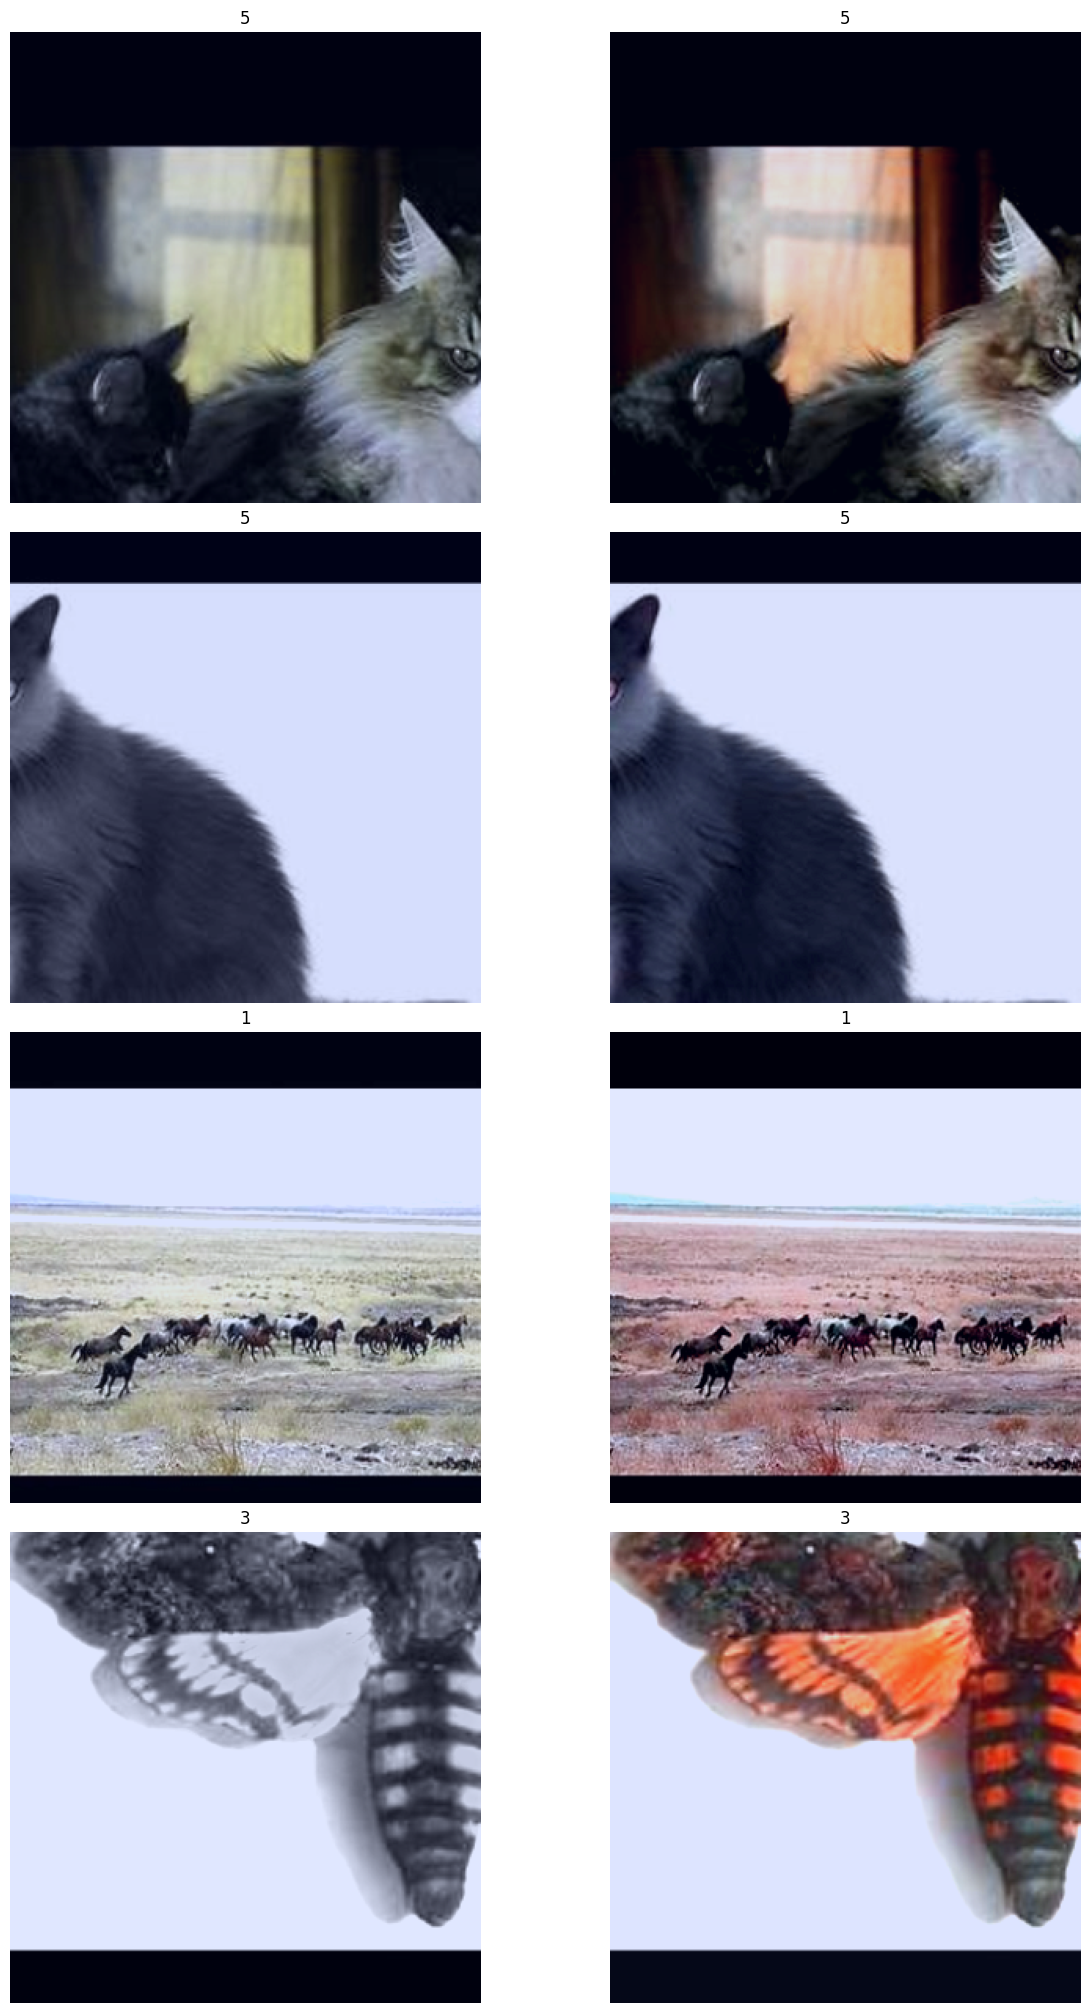

In [11]:
plot_batch(train_loader)